<a href="https://colab.research.google.com/github/muhammadficki/DataMining/blob/main/Prediksi_Harga_Mobil_Bekas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

In [ ]:
# Utk Membaca Data dari file csv menggunakan pandas
row_data = pd.read_csv('toyota.csv')
data_location='toyota.csv'




In [ ]:
#menampilkan 5 baris data paling atas
row_data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [ ]:
row_data.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


In [ ]:
# Menampilkan tipe data setiap kolom
print (row_data.dtypes)

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object


In [ ]:
# Definisikan input output data yang menggunakan tipe data integer dan float
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
x = row_data[features] # Changed 'data' to 'row_data'
y = row_data['price'] # Changed 'data' to 'row_data'
x.shape, y.shape

((6738, 5), (6738,))

In [ ]:
# Membagi data untuk training dan validasi (test)
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 70)

In [ ]:
test_y.shape

(1685,)

In [ ]:
# Membangun machine learning model dengan algoritma K-Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor as KNN_Reg
from sklearn.metrics import mean_squared_error as mse

model = KNN_Reg(n_neighbors = 80)

# training the model:
model.fit(train_x, train_y)
acc1 = model.score(test_x, test_y)

# test for prediction
test_predict = model.predict(test_x)
score = mse(test_predict, test_y)
print(' MSE: ', score, '\n', 'Accuracy: ', acc1)

 MSE:  34239918.03594575 
 Accuracy:  0.09914493863007989


In [ ]:
# Menggunakan Elbow method untuk menentukan nilak K terbaik

def Elbow(K):
  #initiating an empy list
  test_mse =[]

  #train model for every value of K
  for i in K:
    model = KNN_Reg(n_neighbors=i)
    model.fit(train_x, train_y)
    tmp = model.predict(test_x)
    tmp = mse(tmp, test_y)
    test_mse.append(tmp)

  return test_mse

Text(0.5, 1.0, 'Elbow Curve for Test')

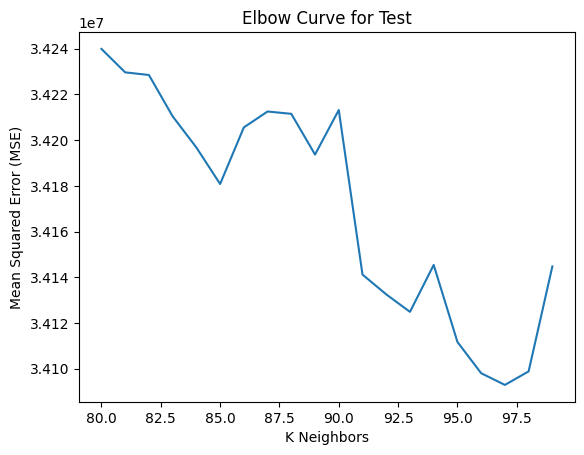

In [ ]:
# Menampilkan grafik nilai k berdasarkan MSE

K = range(80, 100)
test = Elbow(K)

#plotting
plt.plot(K,test)
plt.xlabel('K Neighbors')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Curve for Test')

In [ ]:
# Melakukan koreksi nilai K dengan menggunakan nilai K terbaik berdasarkan hasil dari Elbow method

new_model = KNN_Reg(n_neighbors=97)

# Train model
new_model.fit(train_x, train_y)
acc2 = new_model.score(test_x, test_y)

# Prediction test
print(' Accuracy of new model (%):', acc2*100, '\n', 'Accuracy of old model (%):', acc1*100, '\n Improvement (%):', (acc2-acc1)*100)

 Accuracy of new model (%): 10.301241818100404 
 Accuracy of old model (%): 9.914493863007989 
 Improvement (%): 0.38674795509241466


In [ ]:
# Percobaan ke 1
# Data mobil bekas: year=2019, mileage=5000, tax=145, mpg=30.2, engineSize=2

data_mobil_bekas = np.array([[2019,5000,145,30.2,2]])
prediction_old = model.predict(data_mobil_bekas)
prediction_new = new_model.predict(data_mobil_bekas)
print(' Hasil Prediksi harga mobil dengan old model: £', prediction_old, 'atau jika dirupiahkan yaitu: Rp', prediction_old * 19110*1e-6, 'Juta\n',
      'Hasil Prediksi harga mobil dengan new model: £', prediction_new, 'atau jika dirupiahkan yaitu: Rp', prediction_new * 19110*1e-6, 'Juta')